In [1]:
%cd ..

/mnt/c/Users/XCB/OneDrive - Van Oord/Documents/thesis/code


In [2]:
import pandas as pd
import geopandas as gpd
from glob import glob
import seaborn as sns
from atl_module.plotting import (
    error_lidar_pt_vs_truth_pt,
    plot_photon_map,
    plot_tracklines_overview,
)
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from atl_module.plotting import set_size

In [3]:
aoidflist = []
for aoifile in glob("../data/test_sites/oahu*/AOI.gpkg"):
    # get the name of each site
    sitename = aoifile.split("/")[3]
    df = gpd.read_file(aoifile)
    df["site"] = sitename
    aoidflist.append(df)

aoi_combined_df = pd.concat(aoidflist)

aoi_combined_df.to_file("../data/special_sites/oahu_master/aoi")

/home/mlinds/mambaforge/envs/thesis_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [4]:
tracklines_dflist = [
    gpd.read_file(file) for file in glob("../data/test_sites/oahu*/tracklines")
]
tracklines_combined = pd.concat(tracklines_dflist).reset_index()

tracklines_combined.to_file("../data/special_sites/oahu_master/tracks")

/home/mlinds/mambaforge/envs/thesis_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [5]:
dflist = []

for file in glob("../data/test_sites/oahu*/all_bathy_pts.gpkg"):
    df = gpd.read_file(file)
    sitename = file.split("/")[3].strip("oahu")
    df["Subsite"] = sitename
    dflist.append(df)

df = pd.concat(dflist).drop_duplicates().reset_index()

# df.to_file('../data/special_sites/oahu_master/bathy_pts')

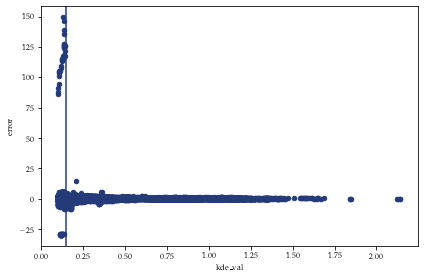

In [6]:
ax = df.plot.scatter(x="kde_val", y="error")
ax.axvline(0.15)

In [21]:
df_nona = df.dropna()
errordict = {
    "RMSE": df_nona.error.pow(2).mean() ** 0.5,
    "R2 Score": r2_score(df_nona.true_elevation, df_nona.sf_elev_MSL),
}
ax = error_lidar_pt_vs_truth_pt(df_nona, errordict, fraction=0.5)
ax.get_figure().savefig(
    "../document/figures/Oahu_combined_lidar_estimated_vs_truth.pdf"
)

del ax

AttributeError: 'DataFrame' object has no attribute 'error'

In [ ]:
df_nona = df_nona[df_nona.true_elevation < 0]
errordict = {
    "RMSE": df_nona.error.pow(2).mean() ** 0.5,
    "R2 Score": r2_score(df_nona.true_elevation, df_nona.sf_elev_MSL),
}
ax = error_lidar_pt_vs_truth_pt(df_nona, errordict, fraction=0.5)
ax.legend("")
ax.get_figure().savefig(
    "../document/figures/Oahu_combined_mountains_removed_lidar_estimated_vs_truth.pdf"
)

# ax.legend(loc='lower right')

plotting photon map
finished plotting photons
finished adding basemap


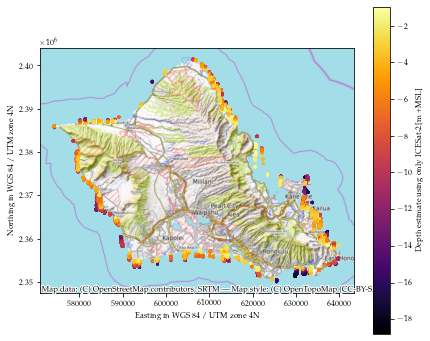

In [9]:
minx, miny, maxx, maxy = df.total_bounds
# this ratio we can feed into the figure sizing function
scale_ratio = (maxx - minx) / (maxy - miny)

fig, ax = plt.subplots(figsize=set_size(fraction=1, ratio=scale_ratio))

plot_photon_map(ax, df)
# artist = df.plot(column='sf_elev_MSL',cmap='inferno',ax=ax,markersize=4)

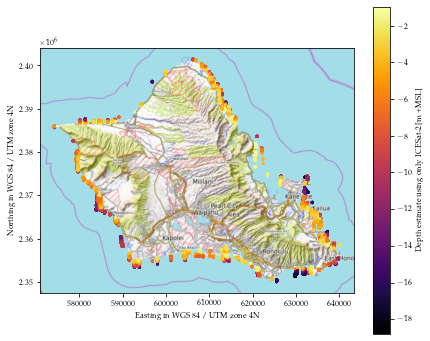

In [10]:
text = fig.axes[0].texts[0]
text.set_visible(False)
text.get_text()
fig.tight_layout()

fig.savefig("../document/figures/Oahu_all_sites_photon_points.pdf", dpi=400)
fig

In [11]:
minx, miny, maxx, maxy = tracklines_combined.total_bounds
# this ratio we can feed into the figure sizing function
scale_ratio = (maxx - minx) / (maxy - miny)
scale_ratio

1.3089821931211385

In [12]:
1 / 1.618

0.6180469715698392

plotting tracklines
finished plotting tracklines
finished plotting basemap


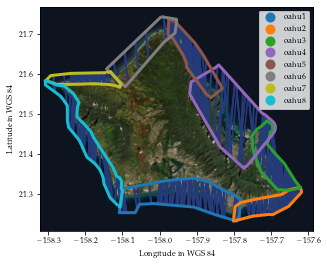

In [13]:
aoi_combined, trackax = plt.subplots(figsize=set_size(fraction=0.8, ratio=scale_ratio))
plot_tracklines_overview(trackax, tracklines_combined)
aoi_combined_df.plot(
    column="site",
    categorical=True,
    legend=True,
    facecolor="none",
    lw=3,
    ax=trackax,
    zorder=2,
)

aoi_combined.axes[0].set_ylabel("Latitude in WGS 84")
aoi_combined.axes[0].set_xlabel("Longitude in WGS 84")
# TODO fix categorical coloring on this

ax = aoi_combined.axes[0]
text = ax.texts[0]
text.set_visible(False)
aoi_combined.tight_layout()
aoi_combined.savefig("../document/figures/Oahu_all_tracklines.pdf")

In [15]:
import numpy as np

rms_agg = lambda x: np.sqrt(np.mean(np.square(x)))

summary_table = (
    df.groupby("Subsite")
    .agg(
        {
            "error": rms_agg,
            "error_abs": "mean",
            # "X": "count"
        }
    )
    .rename(
        columns={
            "error": "RMSE [m]",
            "error_abs": "MAE [m]",
            # "X": "Count bathy Points Identified",
        }
    )
)

In [15]:
summary_table.style.format(precision=2).to_latex(
    buf="../document/tables/Oahu_all_sites_RMSE_summary.tex",
    # caption="Error metrics between ICESat-2 and ground-truth data for all sites in Oahu",
    position="htbp",
    position_float="centering",
    sparse_columns=False,
    hrules=True,
    label="tab:Oahusitestats",
)
summary_table

,RMSE [m],MAE [m]
Subsite,,
1,1.162525,0.768264
2,10.598899,1.447226
3,1.235144,0.463879
4,0.605652,0.389361
5,0.734813,0.504969
6,2.422447,1.756412
7,1.111055,0.717672
8,0.670030,0.520755


In [8]:
renamer = lambda x: f'{x.strip("hu")}'
renamer("hu1")

'1'

In [16]:
rasterrorr_list = []
for oahucsvfile in glob("../document/tables/oahu*.csv"):
    name = oahucsvfile.strip("../document/tables/oa").strip("_kalman_improvement.csv")
    df = pd.read_csv(
        oahucsvfile,
        names=["Error Type", "RMSE [m]", "MAE [m]", "Mean Error [m]"],
        header=0,
    )
    df["sitename"] = name
    rasterrorr_list.append(df)
rastererrordf = (
    pd.concat(rasterrorr_list)
    .set_index(["sitename", "Error Type"])
    .rename(index=renamer, level=0)
)

In [17]:
rastererrordf.style.format(precision=2).to_latex(
    buf="../document/tables/Oahu_all_sites_raster_error_summary.tex",
    caption="Error metrics between ICESat-2 and ground-truth data for all sites in Oahu",
    position="htbp",
    position_float="centering",
    sparse_columns=False,
    hrules=True,
    label="tab:appendix_oahu_raster_error",
    clines="skip-last;index",
)

In [18]:
for name, group in rastererrordf.reset_index().groupby("sitename"):
    print(name)

1
2
3
4
5
6
7
8


In [19]:
summarydf = rastererrordf.unstack()

In [20]:
summarydf

RMSE [m]                                 MAE [m]                \
Error Type     GEBCO Kalman Output Kriging Surface     GEBCO Kalman Output   
sitename                                                                     
1           3.718797      2.289643       18.768504  3.035359      1.859031   
2           5.942184      4.063281       17.419213  4.106219      2.890397   
3           3.731668      2.792149       17.408524  2.375371      1.836683   
4           3.949206      4.018719       17.354656  2.718296      2.745630   
5           3.422135      3.355653       17.625158  2.497747      2.384935   
6           5.241122      6.191733       17.669167  4.193230      4.869321   
7           4.645238      5.695440       17.814918  3.398747      3.909897   
8           4.731511      5.921349       16.988397  3.336638      4.039025   

                           Mean Error [m]                                
Error Type Kriging Surface          GEBCO Kalman Output Kriging Surface  
sitename                                                                 
1                13.051209       2.926192      1.361813      -12.567059  
2                11.742788       3.918042      1.915909      -11.380109  
3                11.612896       1.610980      0.401842      -11.285360  
4                11.557511       0.753787     -0.179267      -10.980851  
5                11.911012       1.495514     -0.252481      -11.659510  
6                12.015846      -3.025100     -3.469250      -11.723323  
7                12.110036      -2.846848     -3.318755      -11.942814  
8                11.388681      -0.355456     -2.292488      -11.056199

In [15]:
percent_change = pd.DataFrame(
    {
        "RMSE Change": (
            summarydf["RMSE [m]"]["GEBCO"] - summarydf["RMSE [m]"]["Kalman Output"]
        )
        / summarydf["RMSE [m]"]["GEBCO"].abs(),
        "MAE Change": (
            summarydf["MAE [m]"]["GEBCO"] - summarydf["MAE [m]"]["Kalman Output"]
        )
        / summarydf["MAE [m]"]["GEBCO"].abs(),
        "Mean Error Change": (
            summarydf["Mean Error [m]"]["GEBCO"]
            - summarydf["Mean Error [m]"]["Kalman Output"]
        )
        / summarydf["Mean Error [m]"]["GEBCO"],
    }
)
# percent_change.style.format(formatter='{:,.2%}').to_latex(buf='.')
percent_change.style.format(formatter="{:,.2%}", escape="latex").to_latex(
    buf="../document/tables/oahu_percent_change.tex",
    caption="Percent reduction in error metrics via the Kalman updating approach. Positive values indicate reduced error, negative ones indicate increased error.",
    position="htbp",
    position_float="centering",
    sparse_columns=False,
    hrules=True,
    label="tab:oahu-percent-change",
)